## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , StratifiedKFold
from sklearn.metrics import accuracy_score , precision_score  , recall_score , f1_score , classification_report , auc , roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , StackingClassifier

import warnings
warnings.filterwarnings('ignore')


## Read CSV file

In [4]:
df = pd.read_csv('/content/Bank Churn.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.shape

(10000, 13)

In [7]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
for i in df.columns:
  print(f'Unique Values in {i}')
  print('------------------------------------------\n')
  print(df[i].unique())
  print('===============Next Column=============================\n')

Unique Values in CustomerId
------------------------------------------

[15634602 15647311 15619304 ... 15584532 15682355 15628319]
===============Next Column=============================

Unique Values in Surname
------------------------------------------

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
===============Next Column=============================

Unique Values in CreditScore
------------------------------------------

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704

In [10]:
# Replace Grography with appropriate name.
df.loc[((df['Geography'] == 'fra') | (df['Geography'] == 'france')) , 'Geography']= 'France'
df.loc[((df['Geography'] == 'espanio') | (df['Geography'] == 'spain')) , 'Geography']='Spain'
df.loc[((df['Geography'] == 'ger') | (df['Geography'] == 'germany') | (df['Geography'] == 'GERMANY') | (df['Geography'] == 'gernamy')) , 'Geography'] ='Germany'

In [11]:
# Verify wheather Grography name is replaced or not with appropriate name
print(df['Geography'].unique())

['France' 'Spain' 'Germany']


In [12]:
# Check for datatypes of feature
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
# Check for duplicatetd values
df.duplicated(keep = 'first').size

10000

In [14]:
# Check for null values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Mining

In [15]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

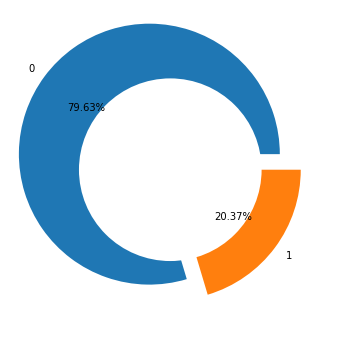

In [16]:
# Check wheather data is balanced or imbalanced
plt.figure(figsize = (10,6))
plt.pie(df['Exited'].value_counts() , labels = df['Exited'].value_counts().keys() , explode = [0.2 , 0] , autopct  = '%0.2f%%');
entre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gcf().gca().add_artist(entre_circle);

In [17]:
# Drop Categorical Columns to use boxplot (identify outlier)
df1 = df.copy()
df1.drop(df.select_dtypes(include = 'object') , axis = 1 , inplace = True)
df1.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

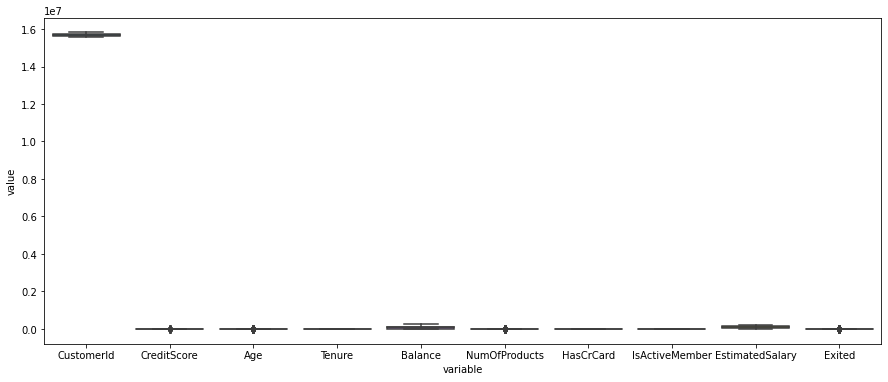

In [18]:
# Outlier Identification
plt.figure(figsize = (15,6))
sns.boxplot(x = 'variable' , y= 'value' , data = pd.melt(df1));

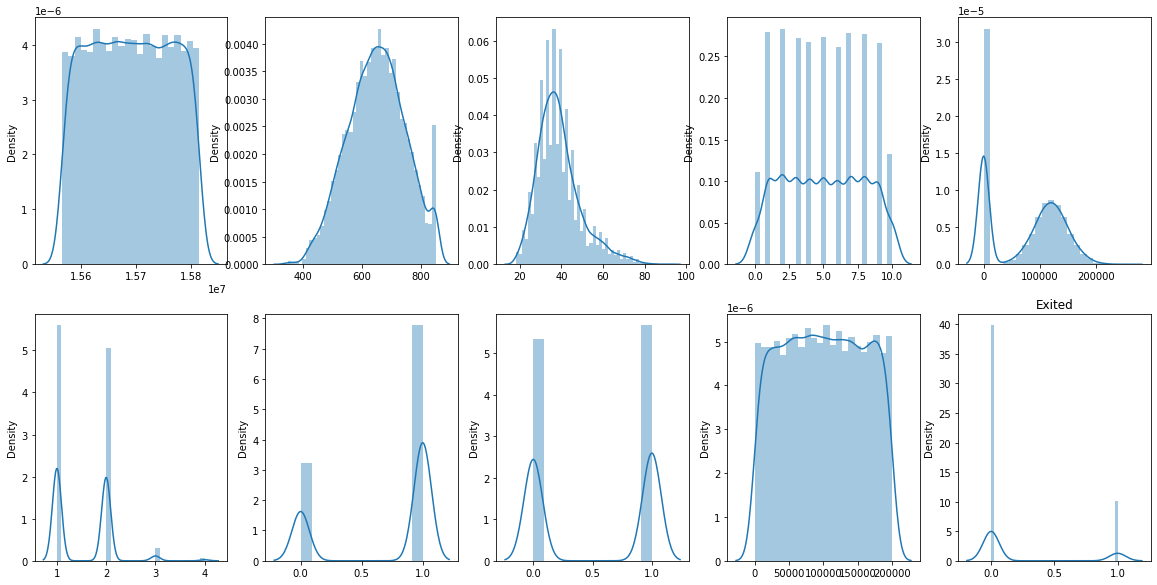

In [19]:
fig , axes = plt.subplots(2,5,figsize=(20,10))
for i , ax in zip(df1.columns , axes.flatten()):
  plt.title(i)
  sns.distplot(x = df[i] , ax = ax)


## EDA

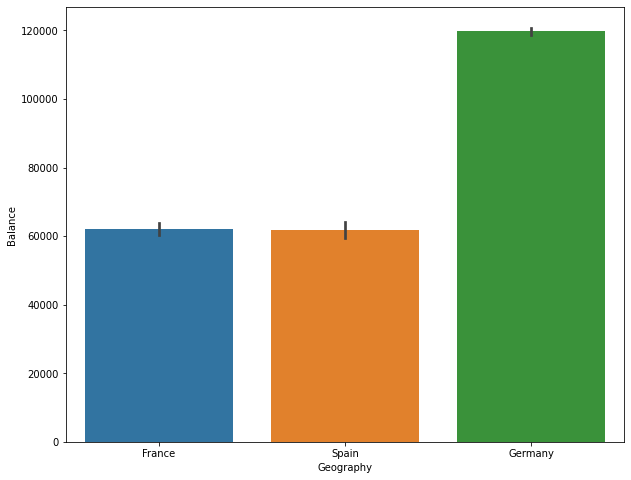

In [20]:
# Germany country has more bank balace amount.
plt.figure(figsize=(10,8))
sns.barplot(x = 'Geography' , y = 'Balance' , data = df);

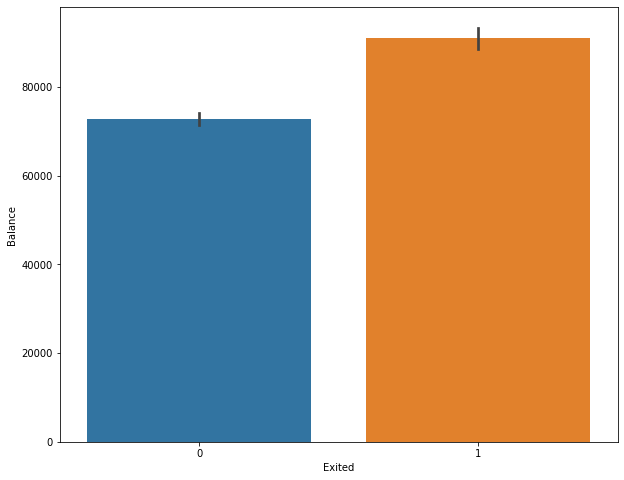

In [21]:
# Exited customers have more bank balace amount.
plt.figure(figsize=(10,8))
sns.barplot(x = 'Exited' , y = 'Balance' , data = df);

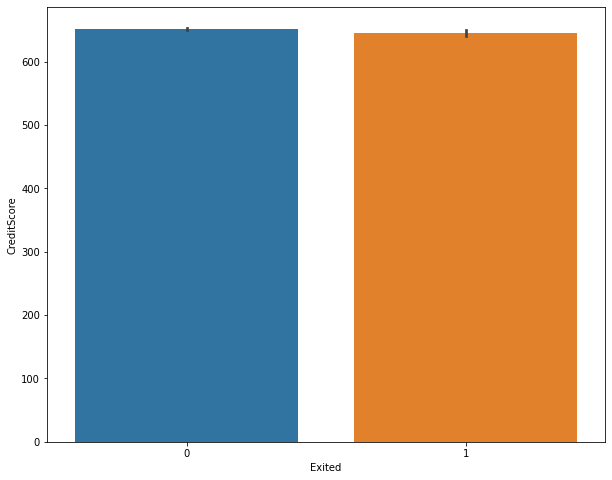

In [22]:
# Exited customers and not exited cusstomers have similar cridit score.
plt.figure(figsize=(10,8))
sns.barplot(x = 'Exited' , y = 'CreditScore' , data = df);

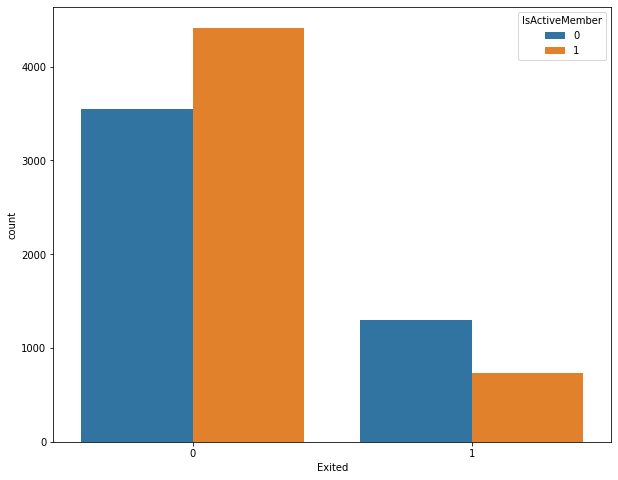

In [23]:
# count of customers w.r.t active members and Exited status.
plt.figure(figsize=(10,8))
sns.countplot(x = 'Exited' , hue = 'IsActiveMember' , data = df);

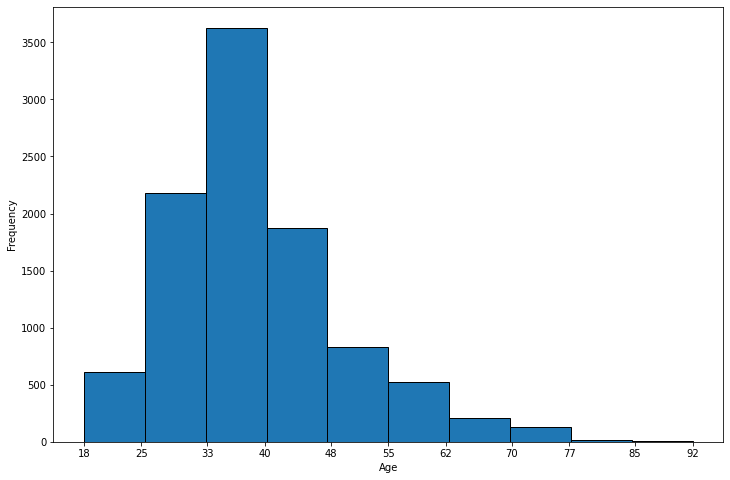

In [24]:
plt.figure(figsize = (12,8))
n , bins , patches = plt.hist(x=df['Age'] , edgecolor = 'black')
plt.xticks(np.round(bins))
plt.xlabel('Age')
plt.ylabel('Frequency');

## Feature Engineering

## Feature Selection

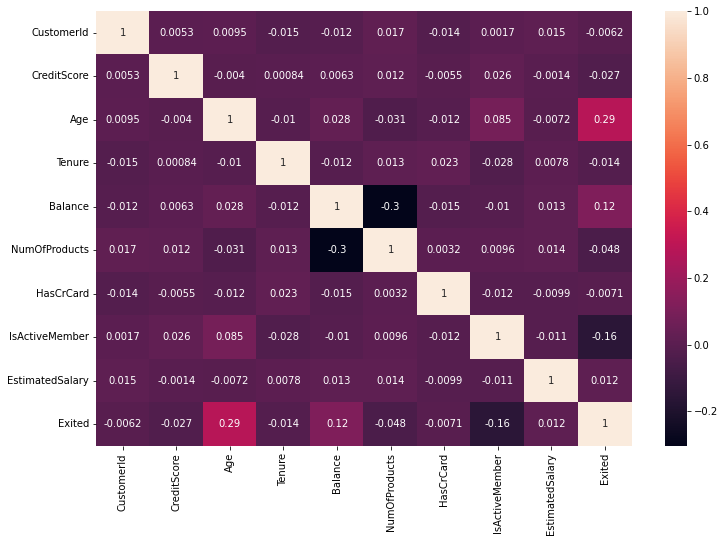

In [25]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.corr() , annot = True)

In [26]:
df2 = df.drop(columns = ['Surname','HasCrCard'])

In [27]:
df2.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


## Feature Tranformation

In [28]:
df3 = pd.get_dummies(df2[['Geography' , 'Gender']])
df4 = pd.concat([df2 , df3] , axis = 1)
df4.drop(columns=['CustomerId','Geography' , 'Gender'] , inplace = True)

In [29]:
df4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0


## Feature Scaling

In [30]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df4) , columns = df4.columns)
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.970243,0.021886,1.977165,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.970243,0.216534,-0.505775,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,-1.030670,0.240687,1.977165,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.030670,-0.108918,-0.505775,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.970243,-0.365276,-0.505775,-1.002804,-0.578736,1.742740,1.095988,-1.095988


## Train Test Split

In [31]:
y = df['Exited']
x = df_scaled.drop(columns = 'Exited')

In [32]:
x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)

## Model

## Logistic Regression

In [33]:
lr = LogisticRegression().fit(x_train , y_train).score(x_train , y_train)
print('Training Performance : ',lr)

Training Performance :  0.8097142857142857


In [34]:
lr_pred = LogisticRegression().fit(x_train , y_train).predict(x_test)
lr_Precision_Score = precision_score(y_test ,lr_pred )
lr_Recall_Score = recall_score(y_test ,lr_pred )

print('Precision Score : ',lr_Precision_Score)
print('Recall Score : ',lr_Recall_Score)

Precision Score :  0.5581395348837209
Recall Score :  0.2054794520547945


# Random Forest Classifier

In [35]:
rfc = RandomForestClassifier(random_state = 42).fit(x_train , y_train).score(x_train , y_train)
print('Training Performance : ',rfc)

Training Performance :  1.0


In [36]:
rfc_pred = RandomForestClassifier(random_state = 42).fit(x_train , y_train).predict(x_test)
rfc_Precision_Score = precision_score(y_test ,rfc_pred )
rfc_Recall_Score = recall_score(y_test ,rfc_pred )

print('Precision Score : ',rfc_Precision_Score)
print('Recall Score : ',rfc_Recall_Score)

Precision Score :  0.7506849315068493
Recall Score :  0.4691780821917808


In [37]:
from sklearn.metrics import SCORERS

In [38]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [42]:
rfc2 = RandomForestClassifier(random_state = 42)
params = {'n_estimators' : [10,20,30,50,100],
          'criterion' : ['gini','entropy'],
          'max_depth' : [4,5,8,10,12,20]}

skf = StratifiedKFold(n_splits = 5 , random_state = 42 , shuffle = True)
rfc_grid_cv = GridSearchCV(estimator = rfc2 , param_grid = params , cv =skf , scoring = 'precision')
rfc_grid_cv.fit(x_train , y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 8, 10, 12, 20],
                         'n_estimators': [10, 20, 30, 50, 100]},
             scoring='precision')

In [43]:
rfc2 = rfc_grid_cv.best_score_
print('Training Performance : ',rfc2)

Training Performance :  0.8962996513856458


In [44]:
rfc2_pred = rfc_grid_cv.predict(x_test)
rfc2_Precision_Score = precision_score(y_test ,rfc2_pred )
rfc2_Recall_Score = recall_score(y_test ,rfc2_pred )

print('Precision Score : ',rfc2_Precision_Score)
print('Recall Score : ',rfc2_Recall_Score)

Precision Score :  0.9020979020979021
Recall Score :  0.2208904109589041


In [45]:
rfc_grid_cv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 20}

In [46]:
rfc_grid_cv.feature_names_in_

array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female',
       'Gender_Male'], dtype=object)

# Stacking Classifier

In [47]:
knn = KNeighborsClassifier()

params = {'n_neighbors' : range(3,110,2)}
knn_grid_cv = GridSearchCV(estimator = knn , param_grid = params , cv = skf , scoring = 'precision')
knn_grid_cv.fit(x_train , y_train)
knn_grid_cv.best_params_

{'n_neighbors': 91}

In [48]:
def build_stacking():
  # Building Base Model
  base = []
  base.append(('Random Forest Classifier_1' , RandomForestClassifier(criterion = 'gini' , max_depth = 4 , n_estimators = 20 , random_state = 42)))
  base.append(('KNeighbors Classifiers' , KNeighborsClassifier(n_neighbors = 91)))

  # Build Meta Model

  meta = LogisticRegression()

  # Stacking Classifier (Ensemble Technique)

  SC = StackingClassifier(estimators = base , final_estimator = meta , cv = skf)
  return SC

In [49]:
model = build_stacking()
model.fit(x_train , y_train)
SC = model.score(x_train , y_train)
print('Training Performance : ',SC)

Training Performance :  0.857


In [50]:
SC_pred = model.predict(x_test)
SC_Precision_Score = precision_score(y_test ,SC_pred )
SC_Recall_Score = recall_score(y_test ,SC_pred )

print('Precision Score : ',SC_Precision_Score)
print('Recall Score : ',SC_Recall_Score)

Precision Score :  0.7340425531914894
Recall Score :  0.4726027397260274


## Multi Stacking Classifier

In [51]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 39.9 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

In [53]:
x_train.shape

(7000, 12)

In [55]:
# Buils the model
model3 = Sequential()
model3.add(Dense(10, input_shape = (12,) , activation = 'relu'))
model3.add(Dense(1 , activation = 'sigmoid'))

# Compile the model
model3.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True) ,metrics = ['accuracy'] , optimizer = 'adam')

In [56]:
estimator = KerasClassifier(model = model3 , epochs =  10, batch_size = 5 , verbose = 0)
results = cross_val_score(estimator, x_train , y_train, cv=skf, scoring='precision')
print("Model3: %.2f  Precision Score" % (results.mean()))

Model3: 0.75  Precision Score


In [57]:
multi_stack = estimator.fit(x_train , y_train , epochs = 10).score(x_train , y_train)
print('Training Performance',multi_stack)
multi_stack_pred = estimator.predict(x_test)

Training Performance 0.8577142857142858


In [58]:
MSC_Precision_Score = precision_score(y_test ,multi_stack_pred )
MSC_Recall_Score = recall_score(y_test ,multi_stack_pred )

print('Precision Score : ',MSC_Precision_Score)
print('Recall Score : ',MSC_Recall_Score)

Precision Score :  0.7407407407407407
Recall Score :  0.4794520547945205


In [60]:
# Store Cross validation score of Logistic Regression , Random  Forest classifier and Stacking classifier
fin_result = []
for i in [LogisticRegression() , rfc_grid_cv , model]:
  result1 = []
  for j in range(1): 
    cross = cross_val_score( i , x_train , y_train , cv = skf , scoring = 'precision' )
    result1.append(cross.tolist())
  fin_result.append(result1)

In [62]:
# Store Cross validation score of Logistic Regression , Random  Forest classifier and Stacking classifier
fin_result = []
for i in [LogisticRegression() , rfc_grid_cv , model]:
   
  cross = cross_val_score( i , x_train , y_train , cv = skf , scoring = 'precision' )
  fin_result.append(cross.tolist())


In [66]:
fin_result.append(results.tolist())

In [67]:
fin_result

[[0.6039603960396039,
  0.5742574257425742,
  0.616822429906542,
  0.6396396396396397,
  0.5887850467289719],
 [0.921875,
  0.9113924050632911,
  0.8133333333333334,
  0.8833333333333333,
  0.8636363636363636],
 [0.7953216374269005,
  0.7414634146341463,
  0.7247191011235955,
  0.7471910112359551,
  0.6979166666666666],
 [0.7806451612903226,
  0.7541899441340782,
  0.7222222222222222,
  0.695,
  0.7770700636942676]]

## Probability

In [68]:
new_df = df.copy()

In [69]:
new_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
df_scaled1 = df_scaled.drop(columns = 'Exited')

In [71]:
new_df['Predicted Probability of No Churn'] = rfc_grid_cv.predict_proba(df_scaled1) [: , 0]
new_df['Predicted Probability of Yes Churn'] = rfc_grid_cv.predict_proba(df_scaled1) [: , 1]

In [72]:
new_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted Probability of No Churn,Predicted Probability of Yes Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.856988,0.143012
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.853389,0.146611
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.384431,0.615569
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.851296,0.148704
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.821522,0.178478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.901575,0.098425
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.902188,0.097812
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.863640,0.136360
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.813335,0.186665


## Model Comparision

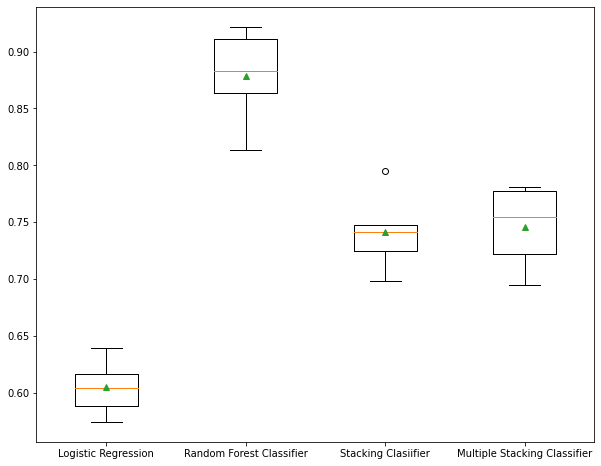

In [73]:
plt.figure(figsize = (10,8))
plt.boxplot(fin_result , showmeans = True )
plt.xticks([1,2,3,4],['Logistic Regression' , 'Random Forest Classifier' , 'Stacking Clasiifier', 'Multiple Stacking Classifier']);

In [74]:
l_fpr , l_tpr , l_threshold = roc_curve(y_test , LogisticRegression().fit(x_train , y_train).predict_proba(x_test)[:,1])
r_fpr , r_tpr , r_threshold = roc_curve(y_test , rfc_grid_cv.predict_proba(x_test)[:,1])
s_fpr , s_tpr , s_threshold = roc_curve(y_test , model.predict_proba(x_test)[:,1])

# auc score

l_auc = auc(l_fpr , l_tpr)
r_auc = auc(r_fpr , r_tpr)
s_auc = auc(s_fpr , s_tpr)

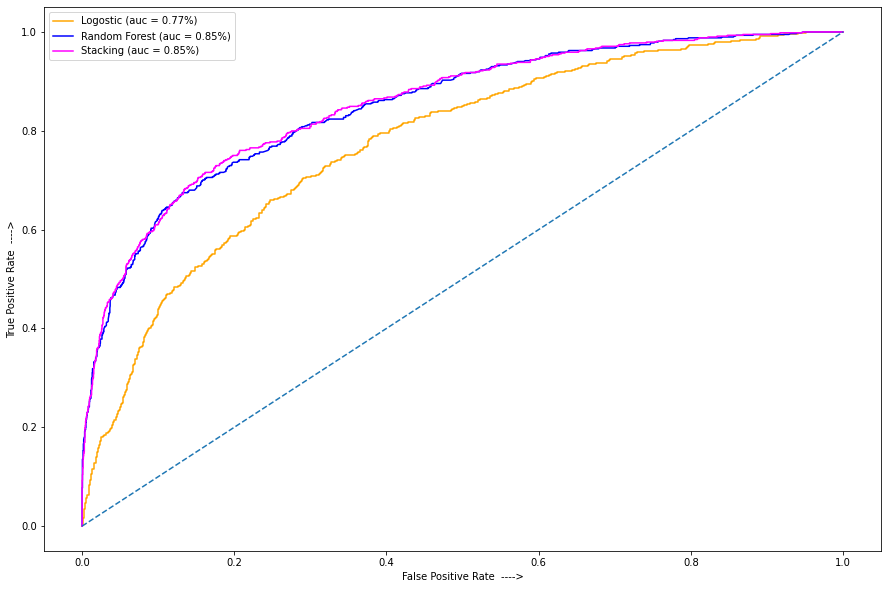

In [75]:
plt.figure(figsize = (15,10))
plt.plot(l_fpr , l_tpr , label = 'Logostic (auc = %0.2f%%)'%(l_auc) , color = 'orange')
plt.plot(r_fpr , r_tpr , label = 'Random Forest (auc = %0.2f%%)'%(r_auc) , color = 'blue')
plt.plot(s_fpr , s_tpr , label = 'Stacking (auc = %0.2f%%)'%(r_auc) , color = 'magenta')
plt.xlabel('False Positive Rate  ---->')
plt.ylabel('True Positive Rate  ---->')
plt.plot([0,1],[0,1] , linestyle = '--')
plt.legend();
plt.show()

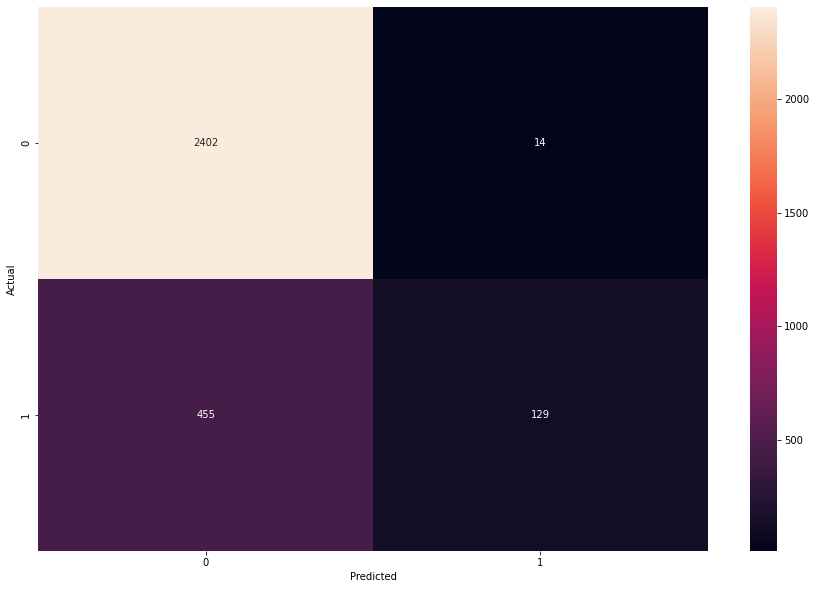

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , rfc2_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual');

# Interpretation

- Data is highly imbalanced so we cannot be dependent over metric 'accuracy'.
- According to Bussiness Senario Precision is vital , Model should not predict False Negative , if it does projects will get delayed.
- Random Forest Classifier is giving best Precision Score than any other models used above.
- Also Random Forest Classifier has good Area Under the Curve.
- Best Parameters for Random Forest Classifier is {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 20}

- Precision can be boosted further if we increase more Hidden layes in Multiple Stacking Classifiers and by doing Hyper parameter tuning over activation optimizers and loss function.


# Conclusion

- Universe is having N-dimension and every dimension as unique patterns, so nothing is 100% same way, computed calculation are accurate and coming to be 90%.

# Please Scroll Below To get Predicted Values With user interactions

In [77]:
from ipywidgets import interact , FloatText , IntText
import ipywidgets as widgets

In [78]:
df5 = df4.drop(columns = 'Exited')
df5.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,79084.10,0,0,1,1,0


In [79]:
df8 = df5.copy()

In [86]:
def ak(a11,b11,c11,d11,e11,f11,g11,h11,i11,j11,k11,l11):
  df8.loc[len(df8.index)]=[a11,b11,c11,d11,e11,f11,g11,h11,i11,j11,k11,l11]
  df8_scaled = pd.DataFrame(scaler.fit_transform(df8) , columns = df8.columns)
  if (rfc_grid_cv.predict(df8_scaled.iloc[-1].to_numpy().reshape(1,-1)) == 1):
    print('\t **Predicted Churn for customer is Yes*')

  else:
    print('\t **Predicted Churn for customer is No**')
  #print(f'\t **Predicted Churn for customer is** {rfc_grid_cv.predict(df8_scaled.iloc[-1].to_numpy().reshape(1,-1))}')



style = {'description_width': '250px'}
layout = widgets.Layout(width='500px')

i = interact(ak , a11 = IntText(description = 'CreditScore' , style = style , layout = layout ,readout=True),
                    b11 = IntText(description = 'Age' , style = style , layout = layout ,readout=True),
             
                    c11 = IntText(description = 'Tenure' , style = style , layout = layout ,readout=True) ,

                    d11 = FloatText(description = 'Balance' , style = style , layout = layout ,readout=True) ,
             g11 = FloatText(description = 'EstimatedSalary' , style = style , layout = layout ,readout=True) ,
                    e11 = widgets.Dropdown(description = 'Num Of Products' , options = [1,2,3,4], style = style , layout = layout ,readout=True),
             
            f11 = widgets.Dropdown(description = 'Is Active Member' , options = [0,1], style = style , layout = layout ,readout=True) , 
             
             
            h11 = widgets.RadioButtons(description = 'Geography_France' , options = [0,1], style = style , layout = layout ,readout=True) ,
             i11 = widgets.RadioButtons(description = 'Geography_Germany' , options = [0,1], style = style , layout = layout ,readout=True) ,
             j11 = widgets.RadioButtons(description = 'Geography_Spain' , options = [0,1], style = style , layout = layout ,readout=True) ,
             k11 = widgets.RadioButtons(description = 'Gender_Female' , options = [0,1], style = style , layout = layout ,readout=True) ,
             l11 = widgets.RadioButtons(description = 'Gender_Male' , options = [0,1], style = style , layout = layout ,readout=True))

interactive(children=(IntText(value=0, description='CreditScore', layout=Layout(width='500px'), style=Descript…

In [87]:
x_test[rfc2_pred==1]

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2750,-1.754076,1.723821,1.378686,-1.225848,2.527057,0.970243,1.210781,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3032,-1.609222,0.579578,-0.695982,0.203112,2.527057,-1.030670,0.609998,-1.002804,-0.578736,1.742740,1.095988,-1.095988
3145,-1.743730,0.865639,-1.041760,-0.114697,-0.911583,-1.030670,0.044347,-1.002804,1.727904,-0.573809,1.095988,-1.095988
764,0.615335,0.388871,-1.041760,1.019235,2.527057,0.970243,1.005396,-1.002804,1.727904,-0.573809,-0.912419,0.912419
6743,-0.988415,1.151700,1.378686,0.989331,-0.911583,-1.030670,1.714991,-1.002804,1.727904,-0.573809,1.095988,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...,...
5018,-0.978068,1.151700,1.032908,-0.242518,-0.911583,-1.030670,1.716649,0.997204,-0.578736,-0.573809,1.095988,-1.095988
7324,-0.450383,0.007457,1.724464,-1.225848,2.527057,-1.030670,0.567766,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4597,0.573948,0.674932,-0.350204,0.460438,-0.911583,-1.030670,0.149708,-1.002804,1.727904,-0.573809,1.095988,-1.095988
8398,1.205101,0.579578,0.687130,0.901690,0.807737,-1.030670,-1.277420,-1.002804,1.727904,-0.573809,1.095988,-1.095988


In [91]:
df5.loc[2750]

CreditScore             481.00
Age                      57.00
Tenure                    9.00
Balance                   0.00
NumOfProducts             3.00
IsActiveMember            1.00
EstimatedSalary      169719.35
Geography_France          1.00
Geography_Germany         0.00
Geography_Spain           0.00
Gender_Female             1.00
Gender_Male               0.00
Name: 2750, dtype: float64

In [92]:
x_test[rfc2_pred==0]

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.030670,-1.013811,-1.002804,1.727904,-0.573809,-0.912419,0.912419
4684,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.970243,0.804921,0.997204,-0.578736,-0.573809,-0.912419,0.912419
1731,-0.512463,0.484225,-0.350204,-1.225848,0.807737,-1.030670,-0.722147,-1.002804,-0.578736,1.742740,1.095988,-1.095988
4742,-1.495407,1.914528,1.032908,0.683816,0.807737,0.970243,1.227481,-1.002804,1.727904,-0.573809,-0.912419,0.912419
4521,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.970243,0.253524,-1.002804,-0.578736,1.742740,1.095988,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...,...
8014,0.832617,0.007457,-1.041760,0.806649,-0.911583,0.970243,-0.438886,-1.002804,-0.578736,1.742740,1.095988,-1.095988
1074,-1.195351,-0.755372,0.687130,0.566865,0.807737,0.970243,-1.109616,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3063,-0.429689,-0.660018,0.687130,-0.073944,-0.911583,0.970243,0.901353,0.997204,-0.578736,-0.573809,-0.912419,0.912419
6487,-0.729746,-0.755372,-1.041760,-1.225848,0.807737,0.970243,-0.627326,0.997204,-0.578736,-0.573809,-0.912419,0.912419


In [94]:
new_df.to_csv('Bank Churn 2.O.csv')